## Introduction

Kaggle competition Season 3 Episode 12.  Binary classification with a kidney stone prediction dataset

This a humble kaggle competition entry project to practice ML/Data Science skills.  While unpolished and unfinished, it should act as demonstrable evidence of these skills. This is an ongoing competition at the time of writing and all work represents my actual proficiency.  Anything copied will be noted and referenced.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Data Preparation

In [10]:
# done in an os independent way on the principle of best practice
# construct the file paths using os.path.join
train_path = os.path.join("input", "train.csv")
test_path = os.path.join("input", "test.csv")
sample_submission_path = os.path.join("input", "sample_submission.csv")

# load the CSV data using pandas
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
sample_submission_data = pd.read_csv(sample_submission_path)

## Exploratory Data Analysis



In [18]:
train_data

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


Gravity, osmo, cond, urea, and calc have a moderate positive correlation with the target variable, which means that higher levels of these variables may increase the risk of kidney stones.

Ph has a weak negative correlation with the target variable, which means that higher levels of pH may reduce the risk of kidney stones.

Gravity, osmo, urea, and calc have a strong positive correlation with each other, indicating that they may be measuring similar aspects of the same underlying phenomenon. Therefore, we may want to consider feature selection to avoid redundancy in our model.

The correlation between other pairs of variables is weak or moderate, indicating that they may not be as strongly related to each other.


I may use Principal Component Analysis to reduce dimensionality, possibly combining Gravity, osmolarity, urea, calcium.

5.887336956521739

               id     gravity          ph         osmo        cond  \
count  414.000000  414.000000  414.000000   414.000000  414.000000   
mean   206.500000    1.017894    5.955459   651.545894   21.437923   
std    119.655756    0.006675    0.642260   234.676567    7.514750   
min      0.000000    1.005000    4.760000   187.000000    5.100000   
25%    103.250000    1.012000    5.530000   455.250000   15.500000   
50%    206.500000    1.018000    5.740000   679.500000   22.200000   
75%    309.750000    1.022000    6.280000   840.000000   27.600000   
max    413.000000    1.040000    7.940000  1236.000000   38.000000   

             urea        calc      target  
count  414.000000  414.000000  414.000000  
mean   278.657005    4.114638    0.444444  
std    136.442249    3.217641    0.497505  
min     10.000000    0.170000    0.000000  
25%    170.000000    1.450000    0.000000  
50%    277.000000    3.130000    0.000000  
75%    385.000000    6.630000    1.000000  
max    620.000000

<Axes: >

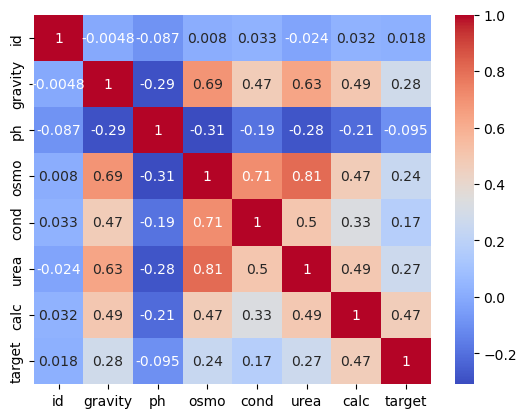

In [41]:
# load the CSV data using pandas
train_data = pd.read_csv("input/train.csv")
test_data = pd.read_csv("input/test.csv")

# check the basic statistics of the data
print(train_data.describe())

# check the data types and missing values
print(train_data.info())

# check the correlation between the variables
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# visualize the distribution of the target variable

#sns.histplot(train_data['target'], kde=True) #Delete

# visualize the relationship between variables using scatter plots
#sns.scatterplot(x=train_data.target.values, y=train_data.ph.values, hue='target', data=train_data)#Delete

# visualize the relationship between variables using interactive plots
#fig = px.scatter(train_data, x='variable1', y='variable2', color='target')
#fig.show()

We can see that ph has a slight correlation with target.

In [55]:
print("average ph when kidney stone present",round(np.mean(train_data.loc[train_data['target']==1,'ph']),3))
print("ph when not present",round(np.mean(train_data.loc[train_data['target']==0,'ph']),3))


average ph when kidney stone present 5.887
ph when not present 6.01


Calcium followed by urea have the strongest positive correlation.

In [57]:
print("average calcium level when kidney stone present",round(np.mean(train_data.loc[train_data['target']==1,'calc']),3))
print("calcium when not present",round(np.mean(train_data.loc[train_data['target']==0,'calc']),3))

average calcium level when kidney stone present 5.794
calcium when not present 2.771


## Feature Engineering
Minimal or no "feature engineering" at this stage beyond simply setting the variables.

After getting an intial respectible score of 0.84, it seems that due to the relatively small dataset (only 414 values), overfitting is happening and reducing it is the lowest hanging fruit to make a better prediction.  Reducing features from 6 down to the 2, Calc and Cond in an attempt to improve output produced a less predictive model scoring a worse 0.779.

Round 3 tries a similar strategy with Cald and Urea with a result of a slight improvement over the intial model and a score of 0.8413





In [70]:
#set variables
#variables = ['gravity','ph','osmo','cond','urea','calc']
variables = ['calc','urea']

train_X = train_data[variables]
train_y = train_data['target']
val_X = test_data[variables]


## Model Building
Random forest model with minimal data engineering will give us a good baseline and may be the final submission for this conest.  It will give us a reference point to see if more sophisticated models with additional data engineering is actually improving our output or just giving us a more sophisticated but less predictive model. 

In [71]:
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X,train_y)
predictions = forest_model.predict(val_X)
rounded_predictions = np.round(predictions, 3)

output = pd.DataFrame({'id': test_data.id, 'target': rounded_predictions})

#output to csv
output.to_csv('output/output.csv', index=False)

## Model Evaluation
We will save this step for later (if we get to it at all in this exercize).  We will first use an almost out of the box random forest regression model, then focus on data engineering, and only afterwards consider further model evaluation and tuning.

## Conclusion

## References
https://github.com/john-draper/kaggle_binary_classification_with_a_kidney_stone_prediction_dataset

https://www.kaggle.com/competitions/playground-series-s3e12/data

https://www.kaggle.com/competitions/playground-series-s3e12/discussion/400152